# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [1]:
from IPython.display import Image
Image(url = "https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/Ridetypes.png")


## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




In [2]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
import pylab as pl
import urllib

import statsmodels.api as sm

import os
import json

%pylab inline



Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
mta = np.load("MTA_Fare.npy")

In [4]:
#urllib.urlretrieve("https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/MTA_Fare.npy","MTA_Fare.npy")

In [5]:
#mta = np.load("MTA_Fare.npy")

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

In [6]:
#after reading the datacube you should see:
mta.shape


(600, 23, 194)

ride types list

In [7]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [8]:
ridetype[:]

array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp', 'ez',
       'ff', 'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 't',
       'umlim', 'xbus', 'stud'],
      dtype='|S5')

In [9]:
weeks = pd.date_range(start= "05/21/2010", periods = 194 , freq='W')

In [10]:
mta.shape

(600, 23, 194)

In [11]:
print (mta.shape)
mta_allsum = np.nansum(mta, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum_ = np.nansum(mta, axis=1)
print (mta_allsum_.shape)

(600, 23, 194)
(23, 194)
(600, 194)


In [12]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

In [13]:
log10(mta_allsum[:1]).shape

(1, 194)

In [14]:
weeks.shape

(194,)

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

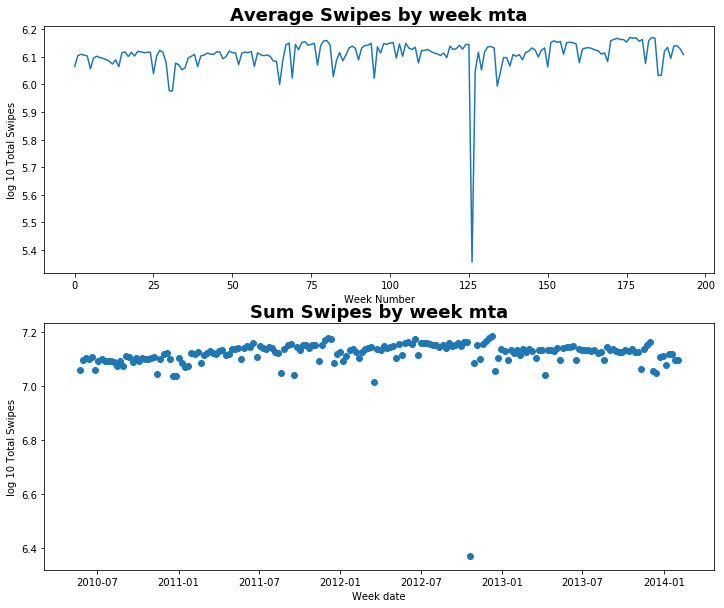

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot((log10(mta_allsum.mean(axis=0))))

plt.xlabel('Week Number')
plt.ylabel('log 10 Total Swipes')
plt.title('Average Swipes by week mta', fontsize = 18, fontweight = "bold")

plt.subplot(212)
plt.scatter(weeks,log10(mta_allsum[:1]))

plt.xlabel('Week date')
plt.ylabel('log 10 Total Swipes')
plt.title('Sum Swipes by week mta', fontsize = 18, fontweight = "bold")

In [16]:
log10(mta_allsum.mean(axis=0)[125:135])

array([ 6.14511894,  5.35556528,  6.04725922,  6.1173613 ,  6.05283068,
        6.11953211,  6.13658058,  6.13752368,  6.13275365,  5.99388433])

## You can see that week 127 (period 128) has a much smaller average, so we shall consult that week

In [17]:
findweek = pd.date_range(start= "05/21/2010", periods = 128 , freq='W')
findweek[127]

Timestamp('2012-10-28 00:00:00', freq='W-SUN')

# The event that occured that week was Hurricane Sandy, bringing the use of mta subway to a very low amount, the month is October 2012, and it is it's last week. Check this link : https://www.theguardian.com/world/us-news-blog/2012/oct/29/hurricane-sandy-new-york-live-blog

## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

### Understanding how the Numpy functions work...

In [18]:
(mta_allsum.mean(axis=1))

array([  1.32422344e+07,   6.27772113e+05,   5.61726546e+04,
         1.87067990e+05,   4.84191598e+04,   4.79451582e+06,
         8.95834275e+06,   1.74753093e+03,   4.85703196e+04,
         9.92690515e+04,   2.25951856e+04,   1.19832624e+05,
         3.65724845e+04,   1.07759397e+05,   5.22398933e+05,
         1.21928149e+05,   6.51162629e+04,   2.74279845e+04,
         1.52181485e+05,   2.14358763e+04,   6.23447938e+03,
         6.59613402e+02,   5.09747392e+05])

In [19]:
(log10(mta_allsum.mean(axis=1)))

array([ 7.12196127,  5.79780202,  4.74952495,  5.27199948,  4.68501725,
        6.68074476,  6.95222767,  3.24242487,  4.68637096,  4.99681387,
        4.35401591,  5.07857507,  4.56315446,  5.03245515,  5.71800228,
        5.08610398,  4.81368947,  4.4381939 ,  5.18236182,  4.33114124,
        3.79480019,  2.81928947,  5.70735501])

In [20]:
firsten = mta_allsum.T[0:10]

In [21]:
firsten.shape

(10, 23)

In [22]:
firsten.mean(axis=0)

array([  1.23471889e+07,   5.33239000e+05,   4.97617000e+04,
         1.90490300e+05,   4.78190000e+04,   3.93416640e+06,
         9.11743400e+06,   1.08441000e+04,   3.27362500e+05,
         5.99081500e+05,   4.11177000e+04,   1.31752500e+05,
        -1.31400000e+02,   1.37159200e+05,   8.43891100e+05,
         6.43788000e+04,   3.10714000e+04,   3.16800000e+02,
         1.20723400e+05,   2.09939000e+04,   6.48910000e+03,
         3.39000000e+02,  -6.00000000e+02])

In [23]:
lastten = mta_allsum.T[184:195]

In [24]:
lastten.shape

(10, 23)

In [25]:
lastten.mean(axis=0)

array([  1.26163344e+07,   6.67683900e+05,   5.53171000e+04,
         1.77870800e+05,   4.94387000e+04,   5.46755120e+06,
         8.20422970e+06,  -1.35500000e+02,  -1.34300000e+02,
        -1.36900000e+02,   3.36418000e+04,   1.59915700e+05,
         1.43614800e+05,   7.93187000e+04,   5.48150100e+05,
         1.67149600e+05,   9.06604000e+04,   3.17250000e+04,
         1.85053400e+05,   2.14495000e+04,   5.22330000e+03,
         6.53800000e+02,   1.06840180e+06])

In [26]:
len(firsten)

10

# Plotting comparisson between first ten weeks and last ten weeks for every type of ridership

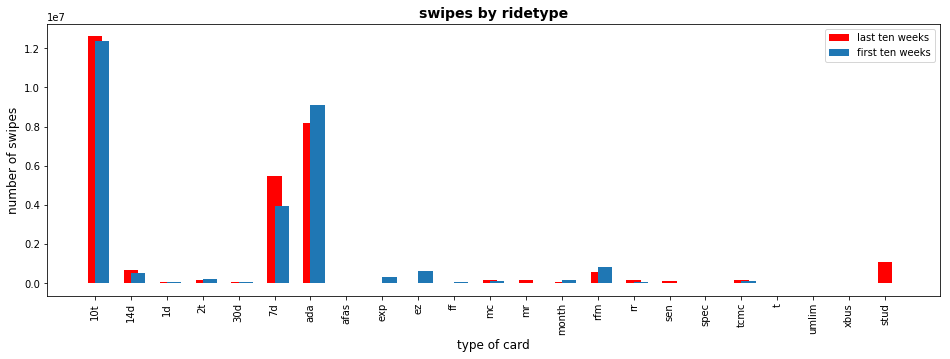

In [27]:
plt.figure(figsize=(16,5))
N = len(ridetype)
x = range(N)
labels = [ridetype[0], ridetype[1], ridetype[2], ridetype[3], ridetype[4], ridetype[5], ridetype[6], ridetype[7], ridetype[8], ridetype[9], ridetype[10], ridetype[11], ridetype[12], ridetype[13], ridetype[14], ridetype[15], ridetype[16], ridetype[17], ridetype[18], ridetype[19], ridetype[20], ridetype[21], ridetype[22]]
plt.xticks(x, labels)
plt.xticks(rotation=90)
plt.bar(x, lastten.mean(axis=0), align="center", color="r", label = "last ten weeks", width=0.4)
plt.bar(x, firsten.mean(axis=0), align="edge", label = "first ten weeks", width=0.4)
plt.xlabel("type of card", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype", weight='bold', fontsize=14)
plt.legend()

### From the previous graph we can see how there are certainly come differences between the first and the last ten weeks, although some differences are to small to spot, that's why we shall plot the logarithm of the averages

# Plotting the logarithm from the first ten weeks average vs the last ten weeks average.

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


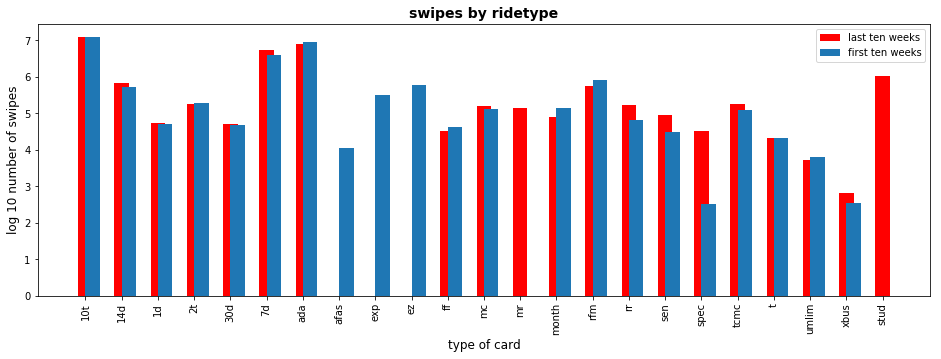

In [28]:
plt.figure(figsize=(16,5))
N = len(ridetype)
x = range(N)
labels = [ridetype[0], ridetype[1], ridetype[2], ridetype[3], ridetype[4], ridetype[5], ridetype[6], ridetype[7], ridetype[8], ridetype[9], ridetype[10], ridetype[11], ridetype[12], ridetype[13], ridetype[14], ridetype[15], ridetype[16], ridetype[17], ridetype[18], ridetype[19], ridetype[20], ridetype[21], ridetype[22]]
plt.xticks(x, labels)
plt.xticks(rotation=90)
plt.bar(x, log10(lastten.mean(axis=0)), align="center", color="r", label = "last ten weeks", width=0.4)
plt.bar(x, log10(firsten.mean(axis=0)), align="edge", label = "first ten weeks", width=0.4)
plt.xlabel("type of card", fontsize=12)
plt.ylabel("log 10 number of swipes", fontsize=12)
plt.title("swipes by ridetype", weight='bold', fontsize=14)
plt.legend()

### From the previous graph we can see how some variables have a different averages from the first ten weeks and the last ten weeks. We can also see that probably there are some ridership types that were cancelled, or introduced, because that have no value for the first ten weeks or the last ten weeks, respectively. As well you can make sure which variable are you looking at by seeing the underneath table

In [29]:
Image(url = "https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/Ridetypes.png")

## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the *number of rides* near the beginning to the *number of rides* near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

#### Create the arrays for plotting

In [30]:
t10 = mta_allsum[0]
d14 = mta_allsum[1]
d1 = mta_allsum[2]
t2 = mta_allsum[3]
d30 = mta_allsum[4]
d7 = mta_allsum[5]
ada = mta_allsum[6]
afas = mta_allsum[7]
exp = mta_allsum[8]
ezpay = mta_allsum[9]
ff = mta_allsum[10]
mc = mta_allsum[11]
mr = mta_allsum[12]
mthly = mta_allsum[13]
rfm = mta_allsum[14]
rr = mta_allsum[15]
sendis = mta_allsum[16]
spec = mta_allsum[17]
tcmc = mta_allsum[18]
tkt = mta_allsum[19]
unl = mta_allsum[20]
xbus = mta_allsum[21]
student = mta_allsum[22]

#### Create the Rolling means for plotting


In [31]:
t10rmean = pd.rolling_mean(t10, 10)
d14rmean = pd.rolling_mean(d14, 10)
d1rmean = pd.rolling_mean(d1, 10)
t2rmean = pd.rolling_mean(t2, 10)
d30rmean = pd.rolling_mean(d30, 10)
d7rmean = pd.rolling_mean(d7, 10)
adarmean = pd.rolling_mean(ada, 10)
afasrmean = pd.rolling_mean(afas, 10)
exprmean = pd.rolling_mean(exp, 10)
ezpayrmean = pd.rolling_mean(ezpay, 10)
ffrmean = pd.rolling_mean(ff, 10)
mcrmean = pd.rolling_mean(mc, 10)
mrrmean = pd.rolling_mean(mr, 10)
mthlyrmean = pd.rolling_mean(mthly, 10)
rfmrmean = pd.rolling_mean(rfm, 10)
rrrmean = pd.rolling_mean(rr, 10)
sendisrmean =pd.rolling_mean(sendis, 10)
specrmean = pd.rolling_mean(spec, 10)
tcmcrmean = pd.rolling_mean(tcmc, 10)
tktrmean = pd.rolling_mean(tkt, 10)
unlrmean = pd.rolling_mean(unl, 10)
xbusrmean = pd.rolling_mean(xbus, 10)
studentrmean = pd.rolling_mean(student, 10)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/lib/python2.7/s

# Plotting all the ridership type timeseries with it's rolling mean

## Popularity indicator: In this indicator we will devide the average of the first ten periods over the average of the last ten periods. In that way if the indicator is higher than 1 it means that that type of ridership was more used at the beginning of the series that at the end of it. On the other hand if the indicator is smaller than 1 it means that the studied ridership type is more popular at the end of the series than at the beginning of the series.

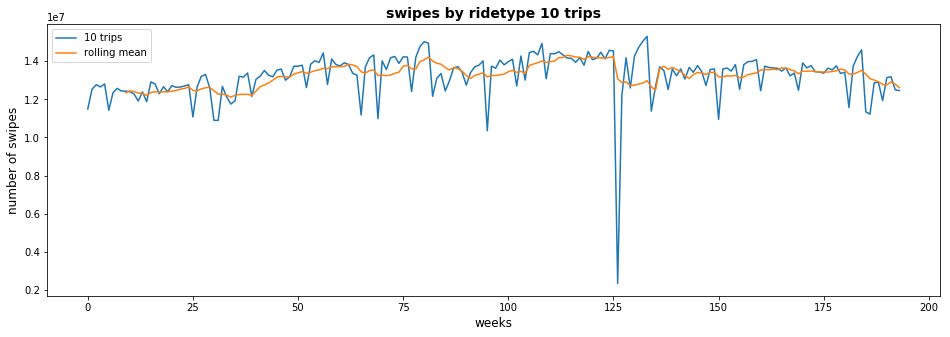

In [32]:
plt.figure(figsize=(16,5))
plt.plot(t10, label = "10 trips")
plt.plot(t10rmean, label ="rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype 10 trips", weight='bold', fontsize=14)
plt.legend()

In [33]:
firsten.mean(axis=0)[0]/lastten.mean(axis=0)[0]

0.97866690185383798

# Increased Popularity because indicator is < 1

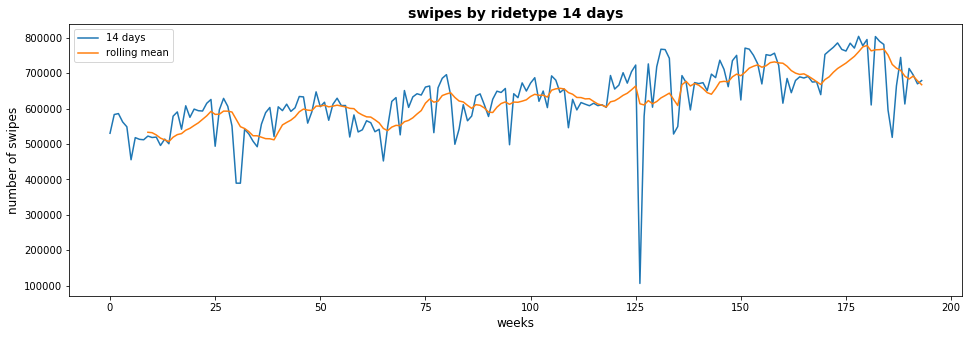

In [34]:
plt.figure(figsize=(16,5))
plt.plot(d14, label = "14 days")
plt.plot(d14rmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype 14 days", weight='bold', fontsize=14)
plt.legend()

In [35]:
firsten.mean(axis=0)[1]/lastten.mean(axis=0)[1]

0.79863989531573243

# Increased Popularity because indicator is smaller than 1

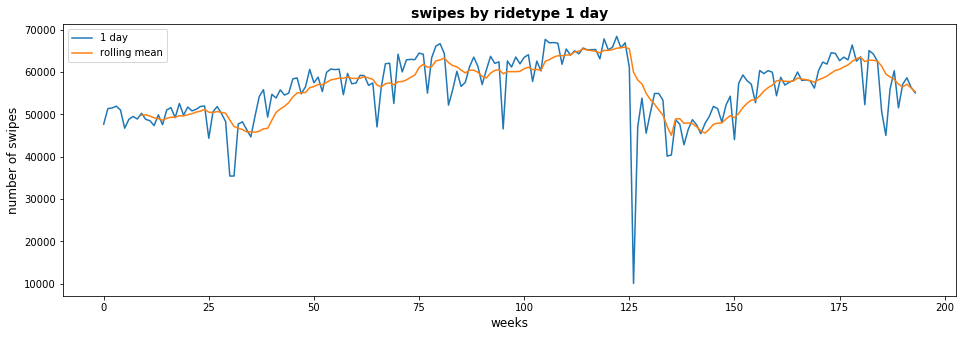

In [36]:
plt.figure(figsize=(16,5))
plt.plot(d1, label = "1 day")
plt.plot(d1rmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype 1 day", weight='bold', fontsize=14)
plt.legend()

In [37]:
firsten.mean(axis=0)[2]/lastten.mean(axis=0)[2]

0.89957174183028388

# Increased popularity because indicator is smaller than 1

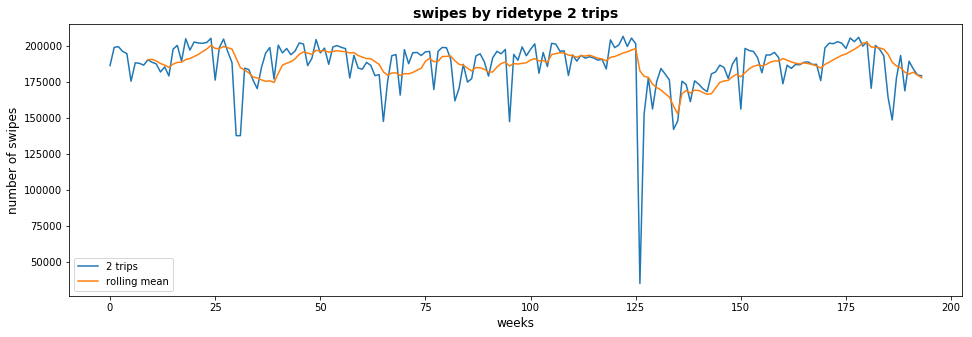

In [38]:
plt.figure(figsize=(16,5))
plt.plot(t2, label = "2 trips")
plt.plot(t2rmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype 2 trips", weight='bold', fontsize=14)
plt.legend()

In [39]:
firsten.mean(axis=0)[3]/lastten.mean(axis=0)[3]

1.0709475641870392

# Decreased popularity because indicator is greater than 1

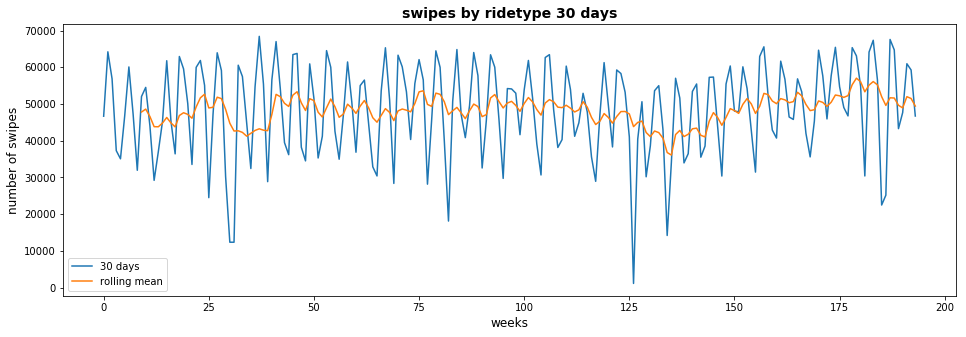

In [40]:
plt.figure(figsize=(16,5))
plt.plot(d30, label = "30 days")
plt.plot(d30rmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype 30 days", weight='bold', fontsize=14)
plt.legend()

In [41]:
firsten.mean(axis=0)[4]/lastten.mean(axis=0)[4]

0.9672382162152322

# Increased popularity because indicator is smaller than 1

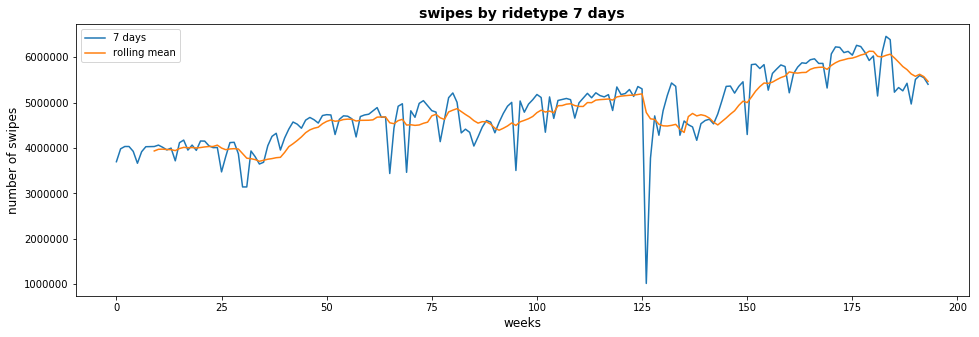

In [42]:
plt.figure(figsize=(16,5))
plt.plot(d7, label = "7 days")
plt.plot(d7rmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype 7 days", weight='bold', fontsize=14)
plt.legend()

In [43]:
firsten.mean(axis=0)[5]/lastten.mean(axis=0)[5]

0.71954815896374225

# Increased Popularity because indicator is smaller than 1

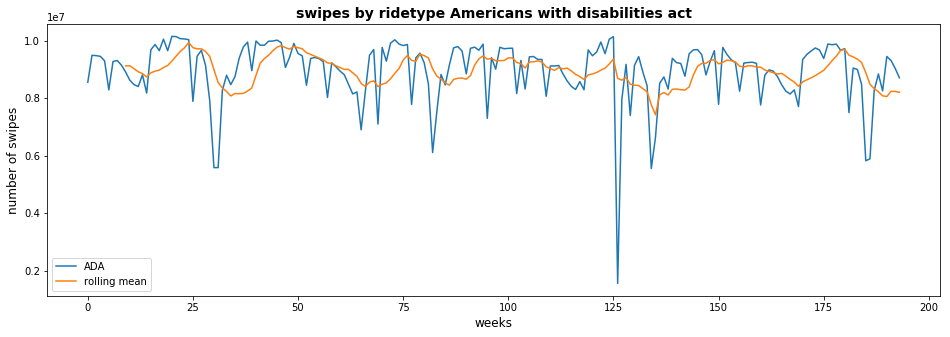

In [44]:
plt.figure(figsize=(16,5))
plt.plot(ada, label = "ADA")
plt.plot(adarmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Americans with disabilities act", weight='bold', fontsize=14)
plt.legend()

In [45]:
firsten.mean(axis=0)[6]/lastten.mean(axis=0)[6]

1.1113089629852757

# Decreased Popularity because indicator is greater than 1

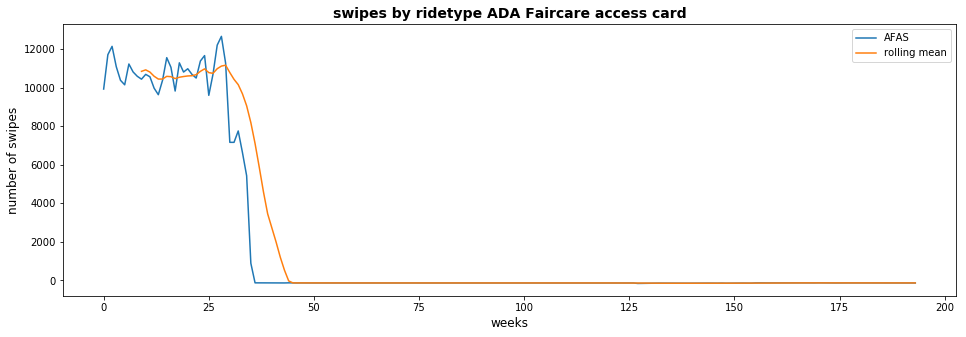

In [46]:
plt.figure(figsize=(16,5))
plt.plot(afas, label = "AFAS")
plt.plot(afasrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype ADA Faircare access card", weight='bold', fontsize=14)
plt.legend()

# Disapeared

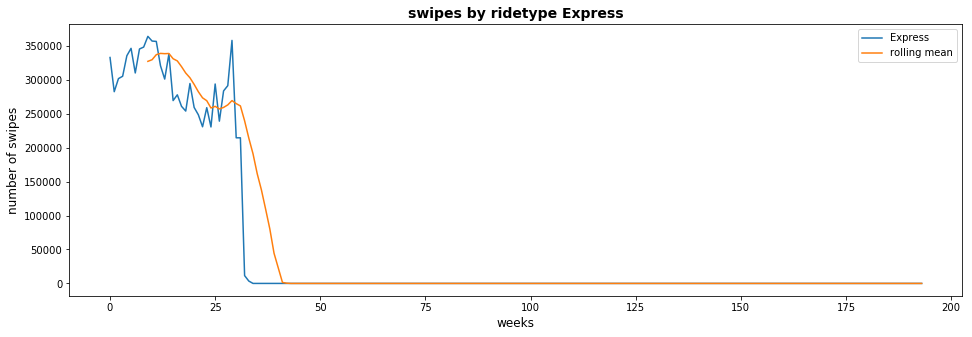

In [47]:
plt.figure(figsize=(16,5))
plt.plot(exp, label = "Express")
plt.plot(exprmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Express", weight='bold', fontsize=14)
plt.legend()

# Disapeared

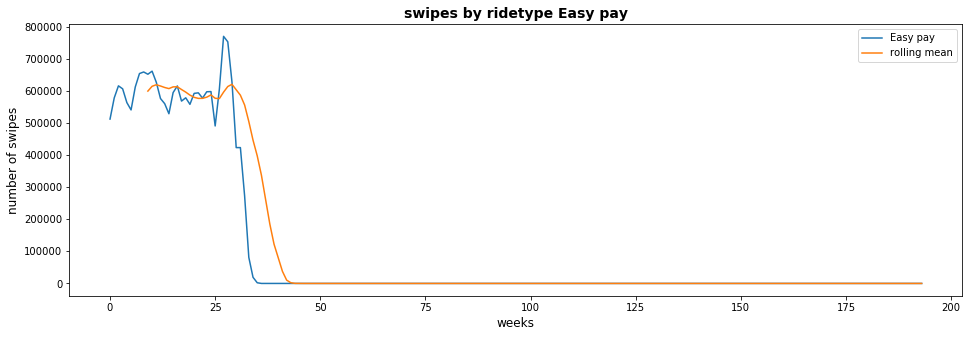

In [48]:
plt.figure(figsize=(16,5))
plt.plot(ezpay, label = "Easy pay")
plt.plot(ezpayrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Easy pay", weight='bold', fontsize=14)
plt.legend()

# Disapeared

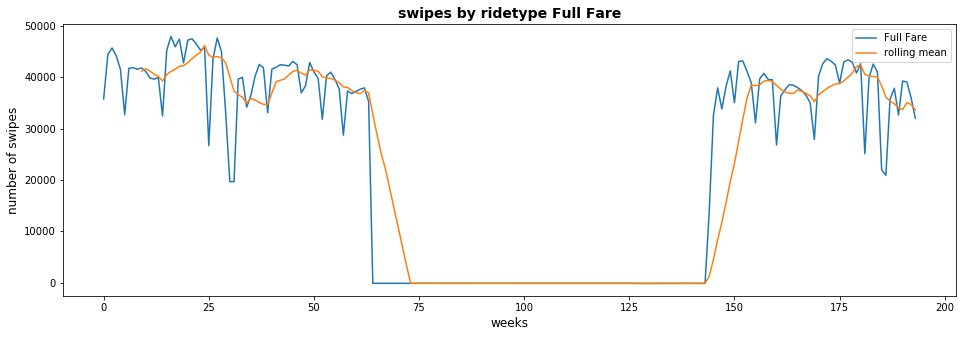

In [49]:
plt.figure(figsize=(16,5))
plt.plot(ff, label = "Full Fare")
plt.plot(ffrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Full Fare", weight='bold', fontsize=14)
plt.legend()

In [50]:
firsten.mean(axis=0)[10]/lastten.mean(axis=0)[10]

1.2222205708374698

# Decreased popularity because indicator is greater than 1.  (very strange period in the middle)

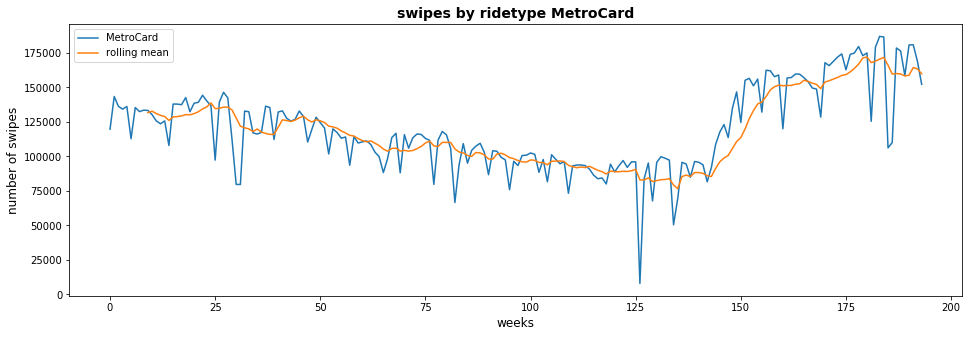

In [51]:
plt.figure(figsize=(16,5))
plt.plot(mc, label = "MetroCard")
plt.plot(mcrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype MetroCard", weight='bold', fontsize=14)
plt.legend()

In [52]:
firsten.mean(axis=0)[11]/lastten.mean(axis=0)[11]

0.8238872105740711

# Increased popularity because indicator is smaller than 1

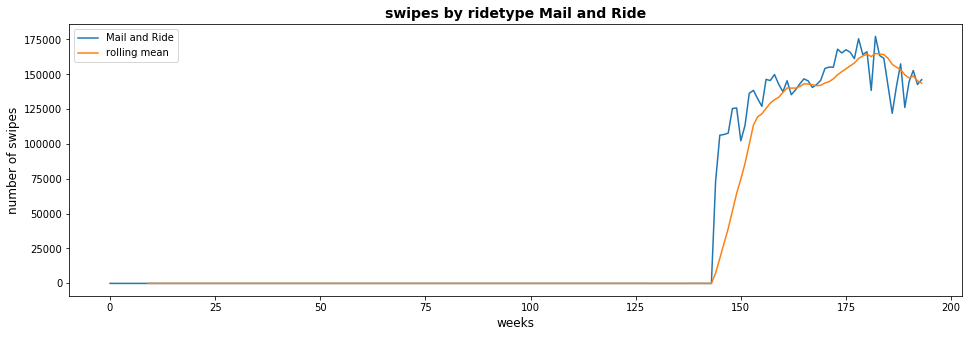

In [53]:
plt.figure(figsize=(16,5))
plt.plot(mr, label = "Mail and Ride")
plt.plot(mrrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Mail and Ride", weight='bold', fontsize=14)
plt.legend()

# Did not existed at the beginning

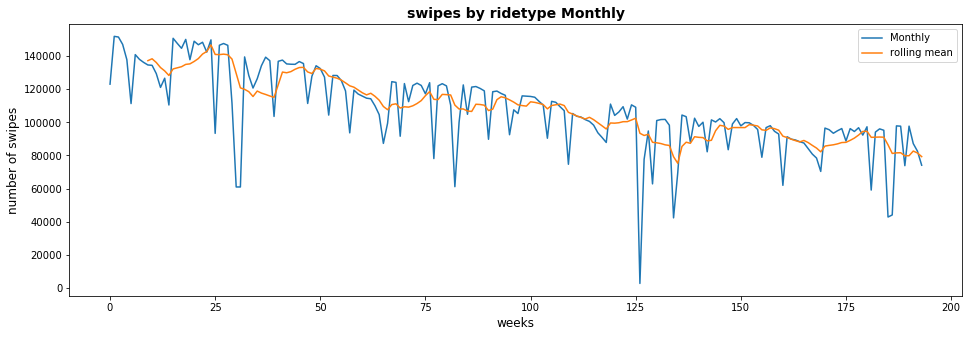

In [54]:
plt.figure(figsize=(16,5))
plt.plot(mthly, label = "Monthly")
plt.plot(mthlyrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Monthly", weight='bold', fontsize=14)
plt.legend()

In [55]:
firsten.mean(axis=0)[13]/lastten.mean(axis=0)[13]

1.729216439502917

# Decreased popularity because indicator is greater than 1

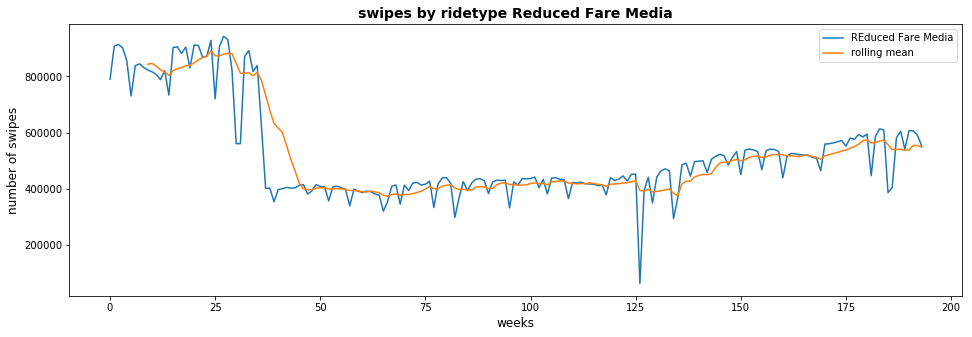

In [56]:
plt.figure(figsize=(16,5))
plt.plot(rfm, label = "REduced Fare Media")
plt.plot(rfmrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Reduced Fare Media", weight='bold', fontsize=14)
plt.legend()

In [57]:
firsten.mean(axis=0)[14]/lastten.mean(axis=0)[14]

1.5395255788514861

# Decreased popularity because indicator is greater than 1

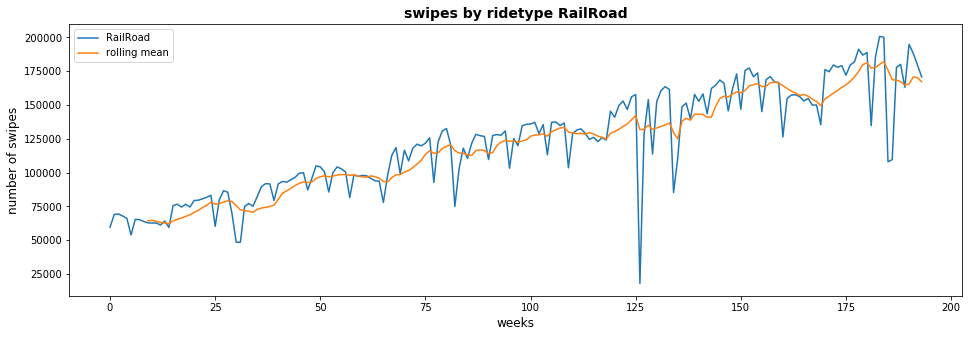

In [58]:
plt.figure(figsize=(16,5))
plt.plot(rr, label = "RailRoad")
plt.plot(rrrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype RailRoad", weight='bold', fontsize=14)
plt.legend()

In [59]:
firsten.mean(axis=0)[15]/lastten.mean(axis=0)[15]

0.38515676974398982

# Increased Popularity because indicator is smaller than 1

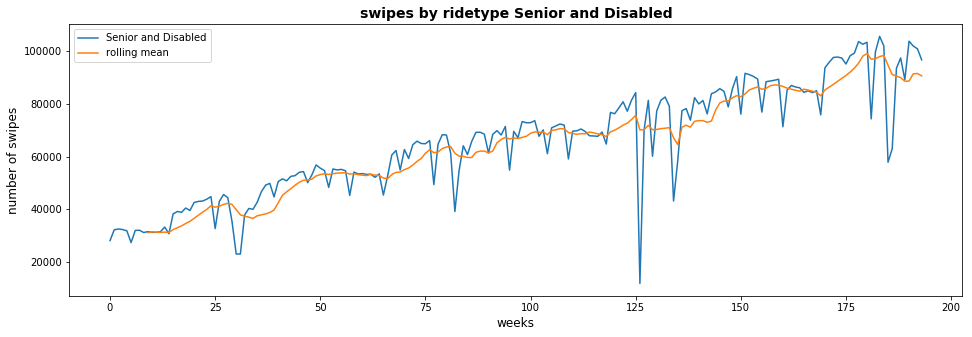

In [60]:
plt.figure(figsize=(16,5))
plt.plot(sendis, label = "Senior and Disabled")
plt.plot(sendisrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Senior and Disabled", weight='bold', fontsize=14)
plt.legend()

In [61]:
firsten.mean(axis=0)[16]/lastten.mean(axis=0)[16]

0.34272295290998056

# Increased Popularity because indicator is smaller than 1

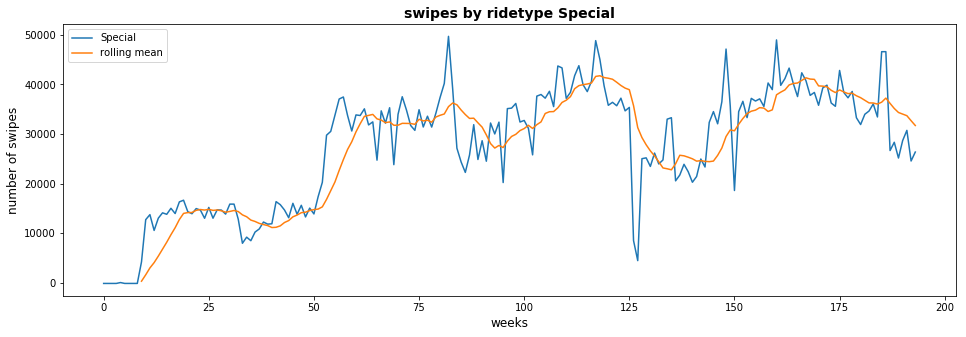

In [62]:
plt.figure(figsize=(16,5))
plt.plot(spec, label = "Special")
plt.plot(specrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Special", weight='bold', fontsize=14)
plt.legend()

In [63]:
firsten.mean(axis=0)[17]/lastten.mean(axis=0)[17]

0.0099858156028368797

# Increased popularity although it is very hard to say because at the beginning it did not existed

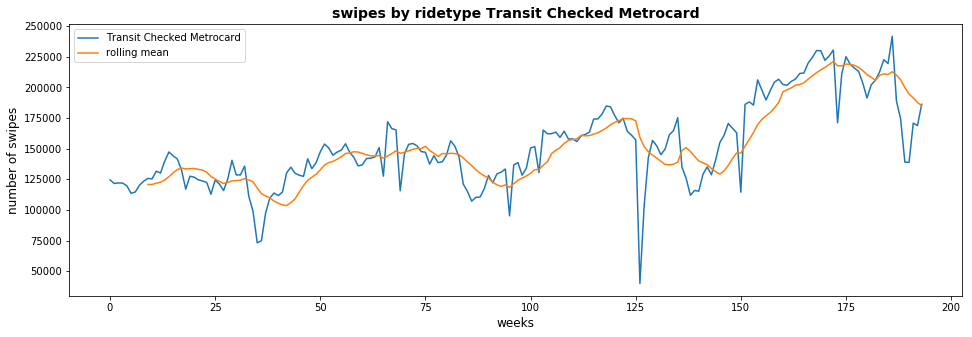

In [64]:
plt.figure(figsize=(16,5))
plt.plot(tcmc, label = "Transit Checked Metrocard")
plt.plot(tcmcrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Transit Checked Metrocard", weight='bold', fontsize=14)
plt.legend()

In [65]:
firsten.mean(axis=0)[18]/lastten.mean(axis=0)[18]

0.65237061302305166

# Increased Popularity because indicator is smaller than 1

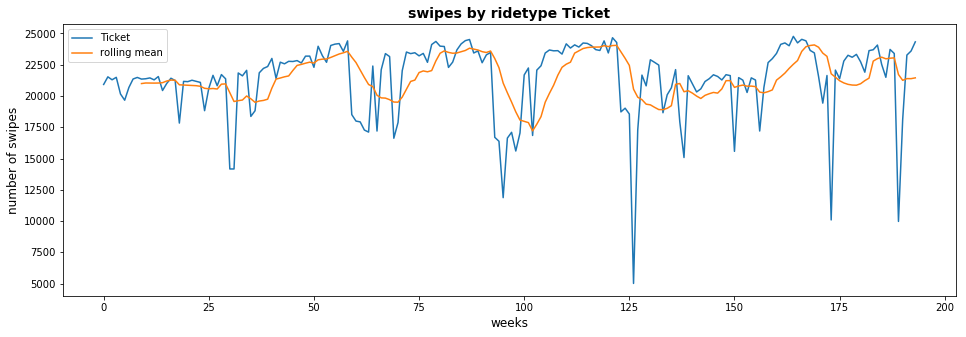

In [66]:
plt.figure(figsize=(16,5))
plt.plot(tkt, label = "Ticket")
plt.plot(tktrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Ticket", weight='bold', fontsize=14)
plt.legend()

In [67]:
firsten.mean(axis=0)[19]/lastten.mean(axis=0)[19]

0.97875941164129709

# Increased popularity because indicator is smaller than 1

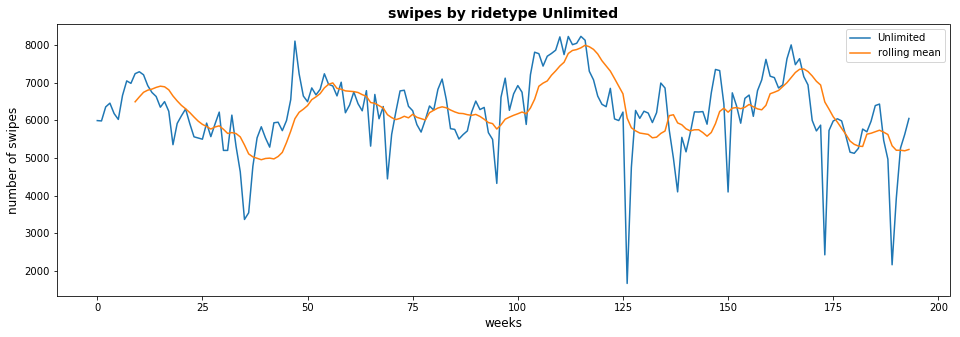

In [68]:
plt.figure(figsize=(16,5))
plt.plot(unl, label = "Unlimited")
plt.plot(unlrmean, label = "rolling mean")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Unlimited", weight='bold', fontsize=14)
plt.legend()

In [69]:
firsten.mean(axis=0)[20]/lastten.mean(axis=0)[20]

1.2423372197652824

# Decreased Popularity because indicator is greater than 1

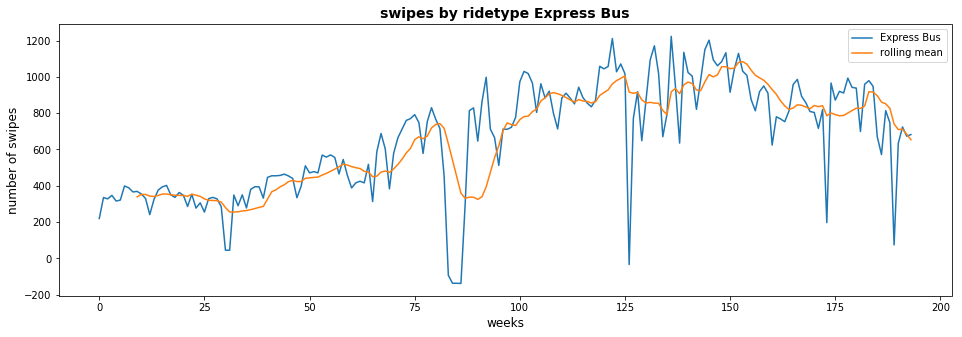

In [70]:
plt.figure(figsize=(16,5))
plt.plot(xbus, label = "Express Bus")
plt.plot(xbusrmean, label = "rolling mean")
plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Express Bus", weight='bold', fontsize=14)
plt.legend()

In [71]:
firsten.mean(axis=0)[21]/lastten.mean(axis=0)[21]

0.51850718874273483

# Increased popularity because indicator is smaller than 1

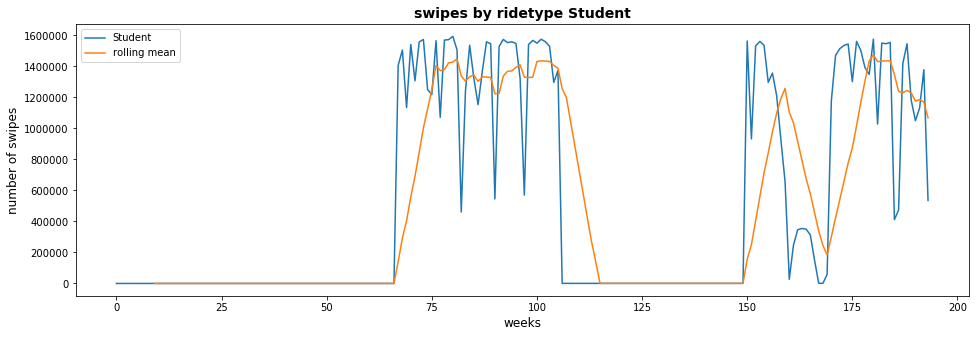

In [72]:
plt.figure(figsize=(16,5))
plt.plot(student, label = "Student")
plt.plot(studentrmean, label = "rolling mean")
plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype Student", weight='bold', fontsize=14)
plt.legend()

# Did not existed at the beginning

# Graph the highest popularity increase vs the highest popularity decrease.

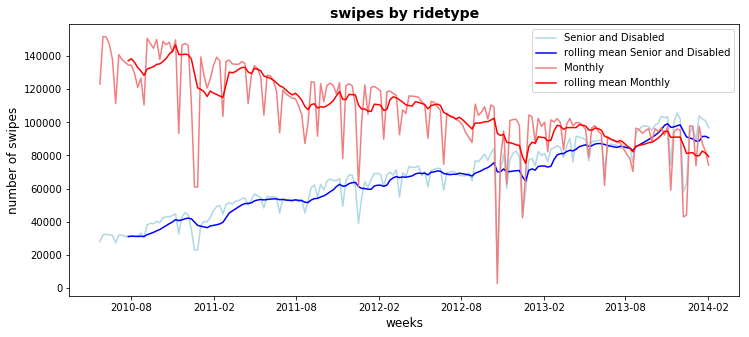

In [134]:
plt.figure(figsize=(12,5))
plt.plot(weeks, sendis, label = "Senior and Disabled", color = "lightblue")
plt.plot(weeks, sendisrmean, label = "rolling mean Senior and Disabled", color = "blue")
plt.plot(weeks, mthly, label = "Monthly", color = "lightcoral")
plt.plot(weeks, mthlyrmean, label = "rolling mean Monthly", color = "red")

plt.xlabel("weeks", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("swipes by ridetype", weight='bold', fontsize=14)
plt.legend()

# You can see the different trends change for the most popularity increase vs the most popularity decrease based on our indicator. They start from very different points and end up very close to each other 

## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [74]:
mta_allsum_ = np.nansum(mta, axis=1)
print (mta_allsum_.shape)

(600, 194)


In [78]:
stop0 = mta_allsum_[300]

# We visualize the Power Spectrum for station 100.


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in double_scalars


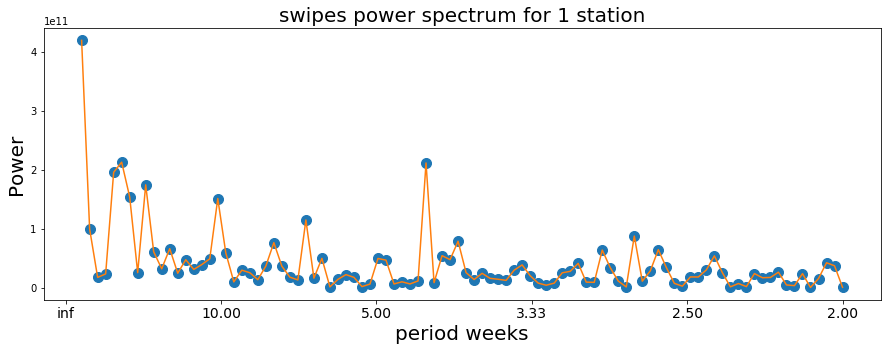

In [82]:
f = np.abs(np.fft.rfft(mta_allsum_[100]))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

ax.plot(np.fft.rfftfreq(194, 1.0)[2:], (f[2:]), 'o', ms=10)
ax.plot(np.fft.rfftfreq(194, 1.0)[2:], (f[2:]), '-')


ax.set_xticklabels([ "%.2f"%(1/f) for f in ax.get_xticks()], fontsize=14)
pl.xlabel("period weeks", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("swipes power spectrum for 1 station", fontsize=20);

### We can see how the periodicity works for just one stop

# Here we plot the power spectrum for all 600 stops

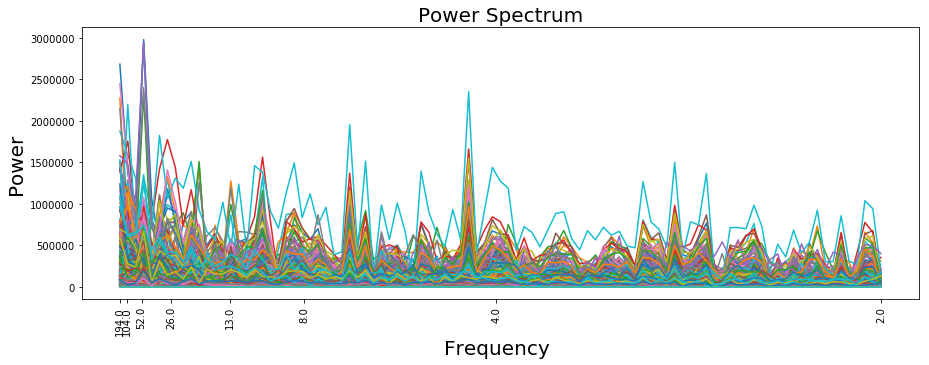

In [135]:
allperiods= [1./194, 1./104, 1./52, 1./26, 1./13, 1./8, 1./4, 1./2]

fig=plt.figure(figsize=(15,5))
ax= fig.add_subplot(111)
for i in range (0,600):
    f = np.abs(np.fft.rfft(mta_allsum_[i]))
    ax.plot(np.fft.rfftfreq(194, 1)[1:], (f)[1:], '-')


ax.set_xticks(allperiods)    
ax.set_xticklabels((["%s"%(1/f) for f in allperiods]), rotation = 90)    
plt.xlabel("Frequency ", fontsize=20)
plt.ylabel("Power", fontsize=20)
plt.title("Power Spectrum", fontsize=20)

    


## We can see some very strong periodicity for 52 weeks.

# We figure out the score for the top 4 stations, and with that we figure out which stations they are.

In [85]:
power_week=[]
for i in range (0,600):
    power_week.append((np.abs(np.fft.rfft(mta_allsum_[i]))[4]))

In [86]:
top_4=sorted(power_week,reverse=True)[:4]

In [87]:
top_4

[2980184.9113423442,
 2950375.4711558297,
 2931882.3472655215,
 2402206.9930728795]

In [88]:
mta_allsum_.shape

(600, 194)

In [89]:
for i in range (0,4):
    print (np.where(np.abs(np.fft.rfft(mta_allsum_))[:,4]==top_4[i]))

(array([0]),)
(array([194]),)
(array([150]),)
(array([327]),)


# We plot those for stations, in order to find out during what time of the year is the periodicity occurring

In [104]:
station1 = mta_allsum_[0]
station2 = mta_allsum_[194]
station3 = mta_allsum_[150]
station4 = mta_allsum_[327]
stationnoperiodicity = mta_allsum_[233]

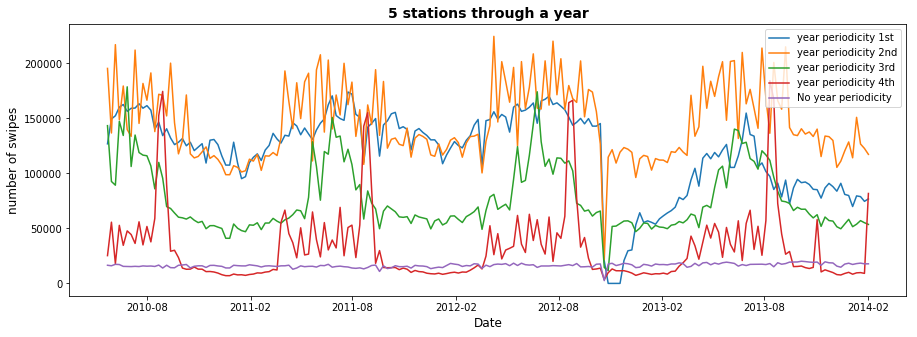

In [108]:
fig=plt.figure(figsize=(15,5))
plt.plot(weeks,(station1), label = "year periodicity 1st")
plt.plot(weeks,(station2), label = "year periodicity 2nd")
plt.plot(weeks,(station3), label = "year periodicity 3rd")
plt.plot(weeks,(station4), label = "year periodicity 4th")
plt.plot(weeks,(stationnoperiodicity), label = "No year periodicity")

plt.xlabel("Date", fontsize=12)
plt.ylabel("number of swipes", fontsize=12)
plt.title("5 stations through a year", weight='bold', fontsize=14)
plt.legend()

### We plot just one Station to see if the periodicity can be seen more clearly

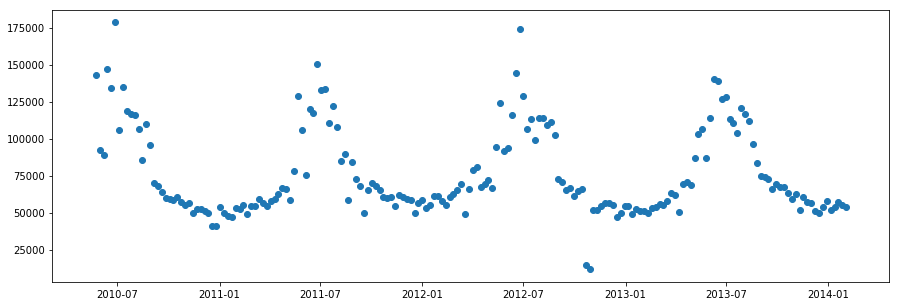

In [101]:
fig=plt.figure(figsize=(15,5))
plt.scatter(weeks,(station3))

# From the previous graphs you can see that mainly the periodicity is presented around July in every year. Probably the reason for this happening has to do with the summer, and a lot of tourists incoming to NYC.

## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

In [110]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# We follow Federica's instructions to do this execise

In [92]:
tots = mta.transpose(2,0,1).reshape(mta.shape[2], mta.shape[1]*mta.shape[0]).T

In [93]:
tots = tots[tots.std(1)>0]

In [112]:
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

In [113]:
pca = PCA(2)
valsproj=pca.fit(vals)

[ 58.45926086  21.88174434  10.69244045   8.51025912   7.62192088
   4.55544929   3.65214628   2.73143484   2.00537571   1.85626942]


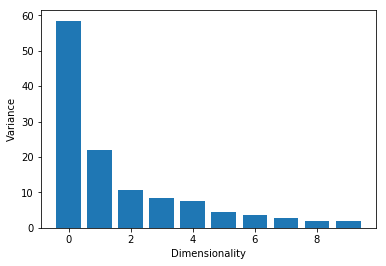

In [131]:
#making pca and graphing data
n=10
pca = PCA(n)
Xproj = pca.fit_transform(vals)
eigenvalues = pca.explained_variance_
print (pca.explained_variance_)
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

In [129]:
n=10 # number of clusters

#train the model.
km=KMeans(random_state=123,n_clusters=n)
res=km.fit(Xproj)

# Here we plot using the two most powerful Principal Components the Clustering

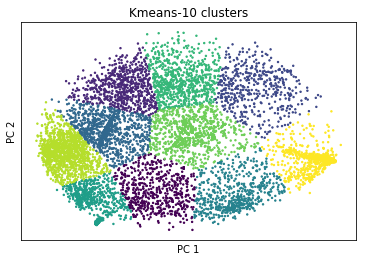

In [132]:
#we graph it in two dimsions
plt.scatter(Xproj[:, 0], Xproj[:, 1], s=2,c=res.labels_, cmap="viridis_r")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

# The Clustering doesn't look that effective if we look only in two dimensions, although it is creating a very clear difference between the points, you cannot see s separation between the points.